In [3]:
#Importing require library for exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [4]:
#Importing the dataset and storing to the varriable
df=pd.read_csv("diamond-prices-2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#Data cleaning by dropping the collumn named 'unnamed: 0'
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Shape of the data
df.shape

(53943, 10)

In [7]:
# Data types of the collumns
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
#Checking for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are No null values in the dataset.

Text(0.5, 1.0, 'z: depth in mm')

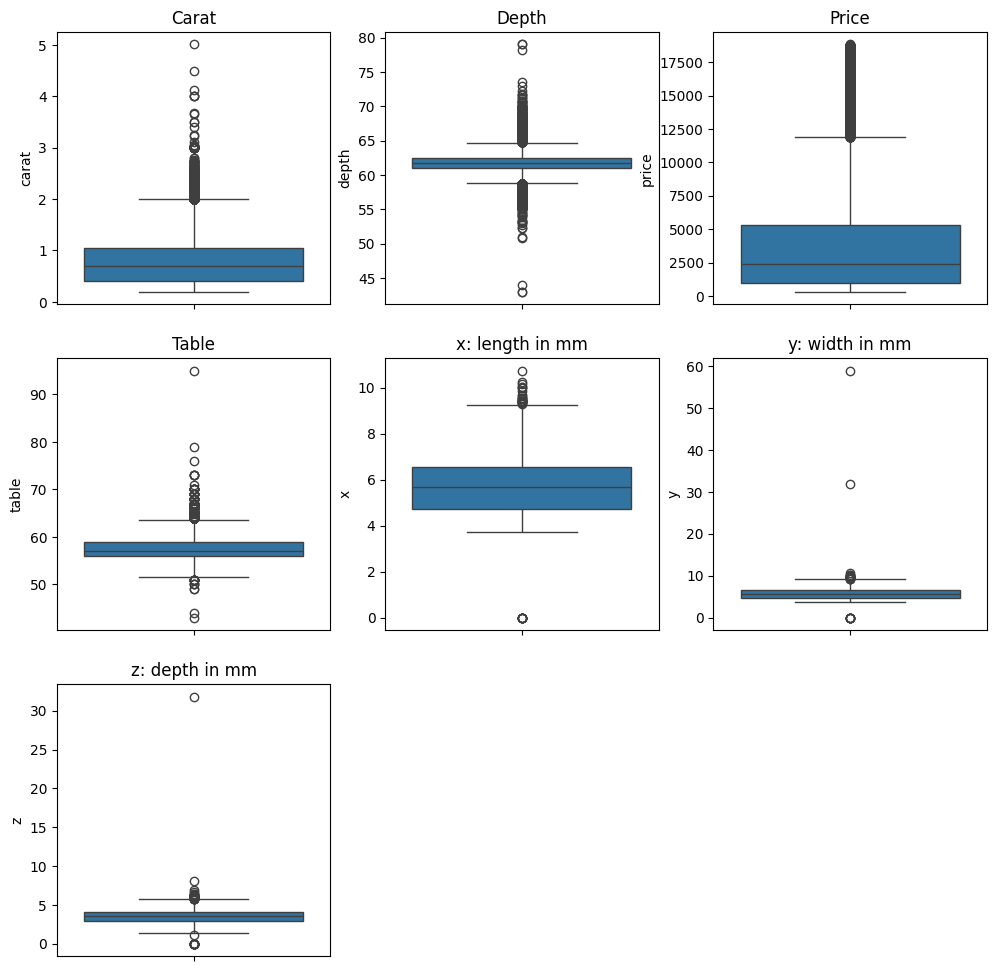

In [9]:
# Checking outliers for all the collumns

plt.figure(figsize=(12,12))

# for carat
plt.subplot(3, 3, 1)
sns.boxplot(df['carat'])
plt.title('Carat')

# for depth
plt.subplot(3, 3, 2)
sns.boxplot(df['depth'])
plt.title('Depth')

# for price
plt.subplot(3, 3, 3)
sns.boxplot(df['price'])
plt.title('Price')

# for table

plt.subplot(3, 3, 4)
sns.boxplot(df['table'])
plt.title('Table')

# for x
plt.subplot(3, 3, 5)
sns.boxplot(df['x'])
plt.title('x: length in mm')

# for y
plt.subplot(3, 3, 6)
sns.boxplot(df['y'])
plt.title('y: width in mm')

# for z
plt.subplot(3, 3, 7)
sns.boxplot(df['z'])
plt.title('z: depth in mm')

As one can clearly observe there are outliers in every numeric variable, but dealing with outliers is not neede here because of its domain since some exceptional diamonds can have higher carat, more depth high price etc.

So the above plot is just to check there are outliers or not.


Text(0.5, 0, 'Clarity')

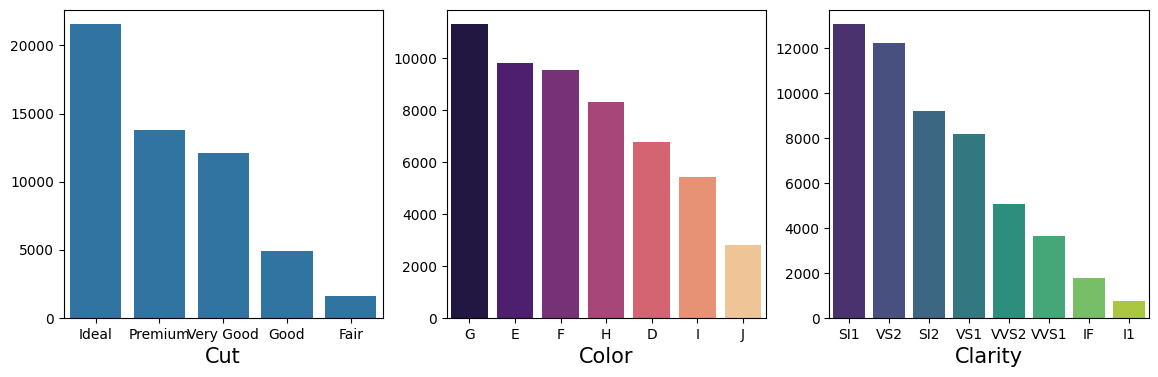

In [10]:
#checking catrgorical variables

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(y=df['cut'].value_counts().values, x=df['cut'].value_counts().index)
plt.xlabel('Cut', fontsize=15)

plt.subplot(1,3,2)
sns.barplot(y=df['color'].value_counts().values, x=df['color'].value_counts().index,palette='magma')
plt.xlabel('Color', fontsize=15)

plt.subplot(1,3,3)
sns.barplot(y=df['clarity'].value_counts().values, x=df['clarity'].value_counts().index,palette='viridis')
plt.xlabel('Clarity', fontsize=15)

One important insight from the above plots is that no of different categories are less than 10 in all 3 variables


In [11]:
#which columns are categorical and numerical
diamonds_cat = ['cut', 'color', 'clarity']
diamonds_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

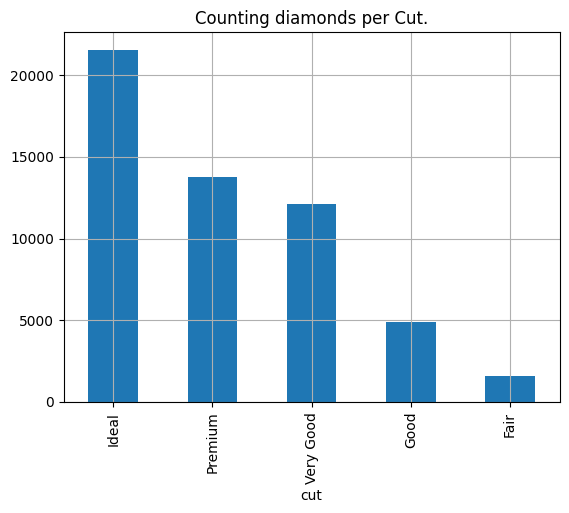

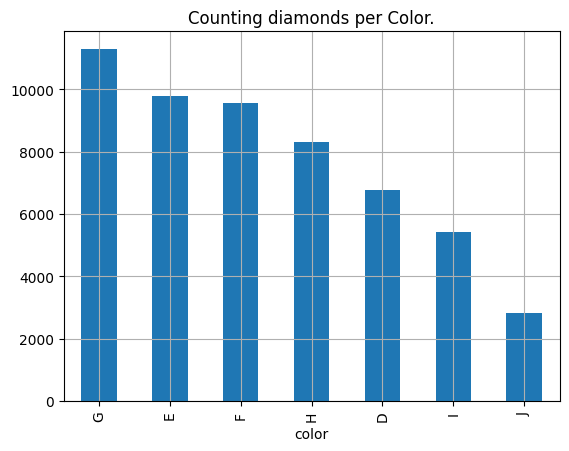

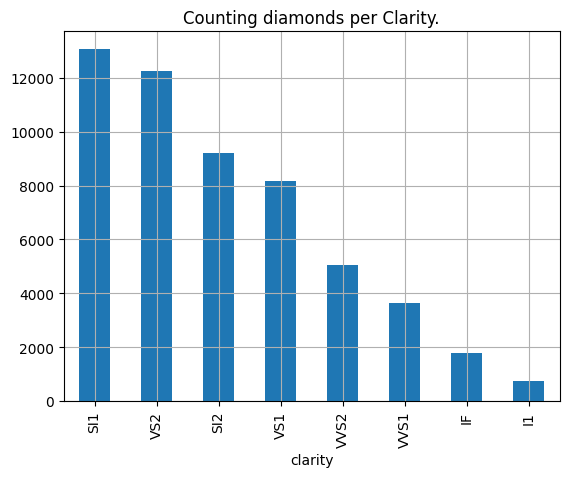

In [12]:
#counting diamond based on different catagory
for c in diamonds_cat:
    df[f'{c}'].value_counts().plot(kind='bar', title=f'Counting diamonds per {c.title()}.')
    plt.grid()
    plt.show()

In [13]:
df.loc[(df.price == df.price.max())]

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


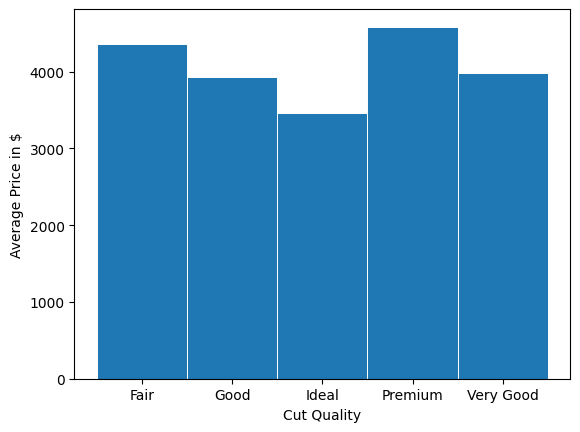

In [14]:
# Average price by cut quality of diamond
cut_quality=df.groupby(["cut"]).aggregate(avg_price=("price","mean"))
cut_quality=cut_quality.reset_index()
cut_quality.sort_values("avg_price",ascending=False)
y = cut_quality["avg_price"]
x = cut_quality["cut"]

# plot
fig, ax = plt.subplots()
plt.xlabel("Cut Quality")
plt.ylabel("Average Price in $")
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

In [15]:
#Maximum Average price per Cut and Clarity of diamond
cut_clarity=df.groupby(["cut","clarity"]).aggregate(avg_price=("price","mean"))
cut_clarity=cut_clarity.reset_index()
cut_clarity.sort_values(["cut","avg_price"],ascending=[True,False])
temp=cut_clarity.groupby(["cut"]).aggregate(max_price=("avg_price","max")).reset_index()
cut_clarity=cut_clarity.merge(temp,left_on="avg_price",right_on="max_price",how="right")
cut_clarity=cut_clarity[["cut_x","clarity","avg_price"]]
cut_clarity.rename(columns={"cut_x":"cut"},inplace=True)
cut_clarity


,cut,clarity,avg_price
0,Fair,SI2,5173.916309
1,Good,SI2,4580.260870
2,Ideal,SI2,4755.952656
3,Premium,SI2,5545.936928
4,Very Good,SI2,4988.688095


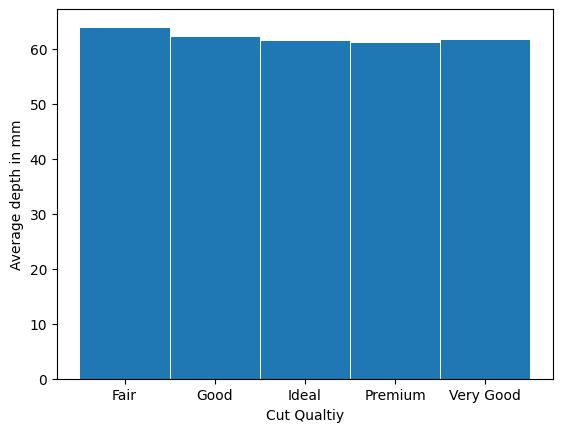

In [16]:
#Depth based on Cut quality
depth=df.groupby(["cut"]).aggregate(avg_depth=("depth","mean"))
depth=depth.reset_index()
depth.sort_values("avg_depth",ascending=False)
y = depth["avg_depth"]
x = depth["cut"]

# plot
fig, ax = plt.subplots()
plt.xlabel("Cut Qualtiy")
plt.ylabel("Average depth in mm")
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

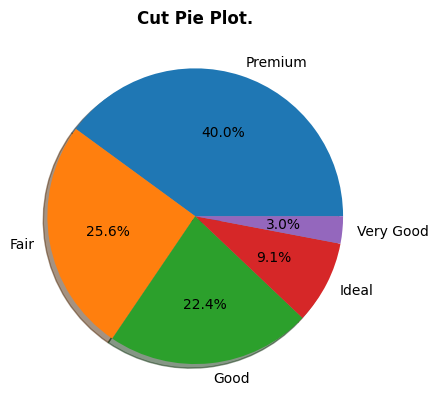

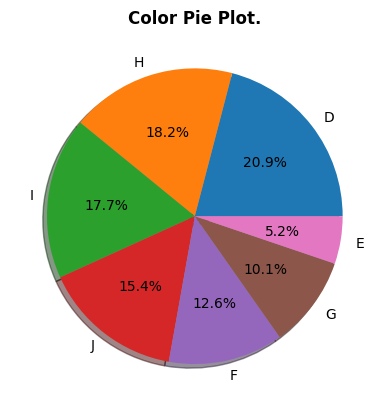

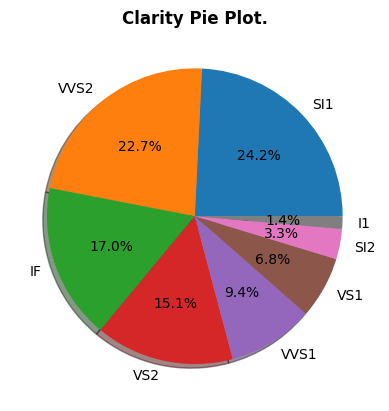

In [17]:
#Pie chart based on cut, color and clarity

for variable in ['cut', 'color', 'clarity']:
    plt.pie(df.value_counts(variable), shadow=True, autopct='%1.1f%%', labels=list(set(df[variable])))
    plt.title(f'{variable.title()} Pie Plot.', fontweight='bold')
    plt.show()

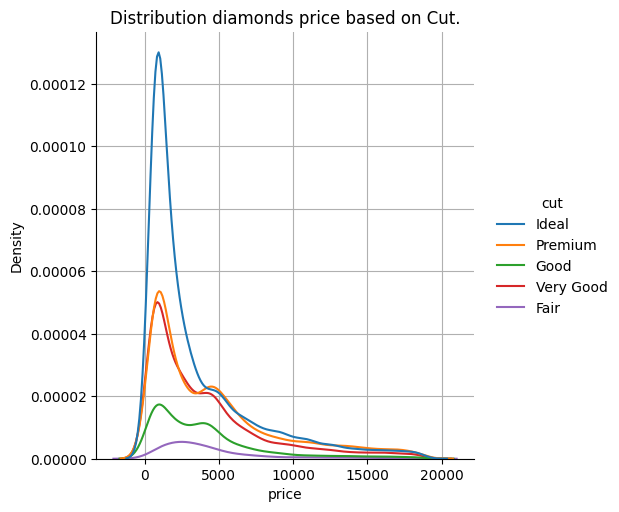

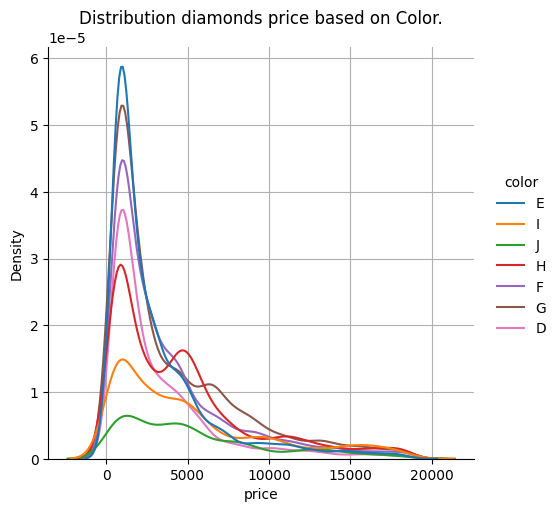

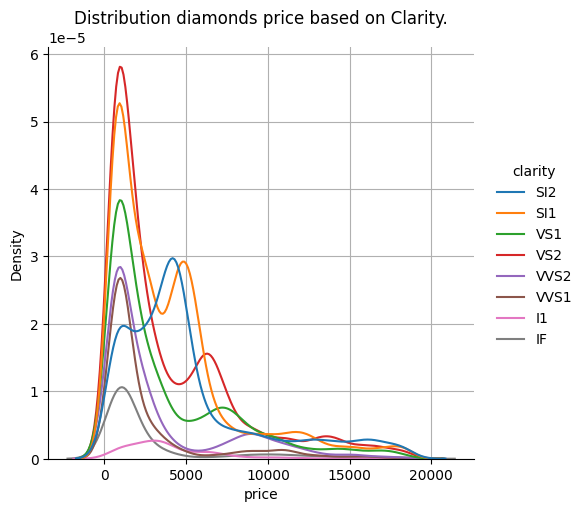

In [18]:
for c in ['cut', 'color', 'clarity']:
    sns.displot(data=df, x="price", hue=f"{c}", kind='kde')
    plt.title(f'Distribution diamonds price based on {c.title()}.')
    plt.grid()
    plt.show()

In [19]:
c = df[(df.price >= df.price.min()) & (df.price <= df.price.quantile(q=0.25))].shape[0]
d = df[(df.price > df.price.quantile(q=0.25)) & (df.price <= df.price.quantile(q=0.50))].shape[0]
e = df[(df.price > df.price.quantile(q=0.50)) & (df.price <= df.price.quantile(q=0.75))].shape[0]
f = df[(df.price > df.price.quantile(q=0.75)) & (df.price <= df.price.max())].shape[0]

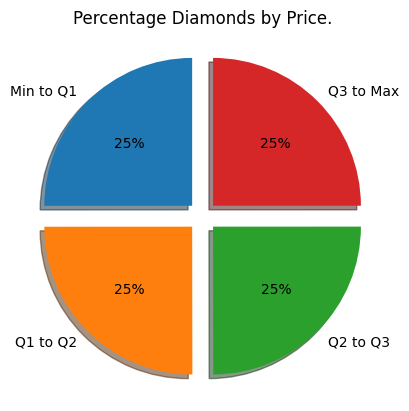

In [20]:
plt.pie([c, d, e, f], labels= ['Min to Q1', 'Q1 to Q2', 'Q2 to Q3', 'Q3 to Max'], explode = (0.1, 0.1, 0.1, 0.1), autopct='%.0f%%', shadow=True, startangle=90)
plt.title('Percentage Diamonds by Price.')
plt.show()

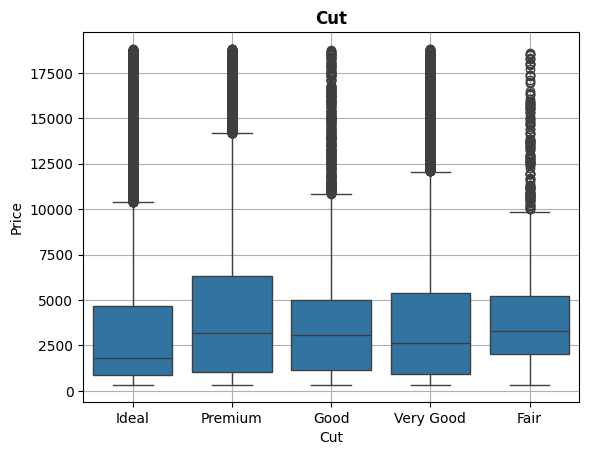

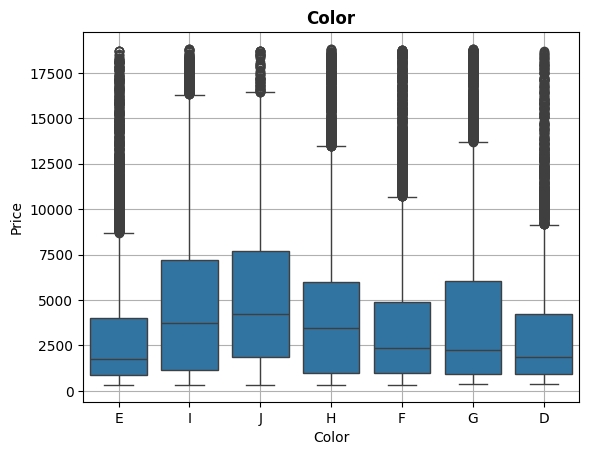

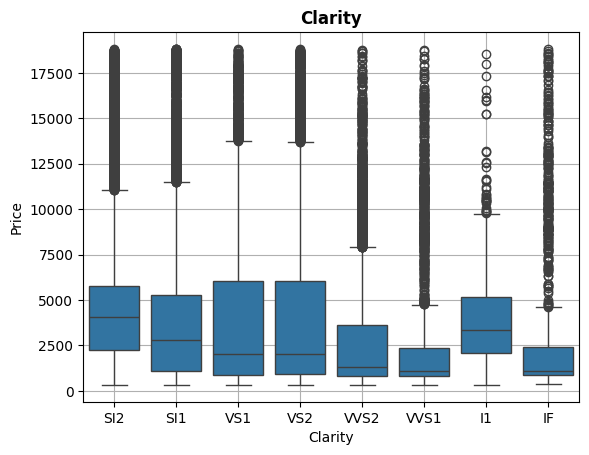

In [21]:
for c in ['cut', 'color', 'clarity']:
    ax = sns.boxplot(x=f'{c}', y="price", data=df, dodge=False).set_title(f'{c.title()}', fontweight = 'bold')
    plt.ylabel('Price')
    plt.xlabel(f'{c.title()}')
    plt.grid()
    plt.show()

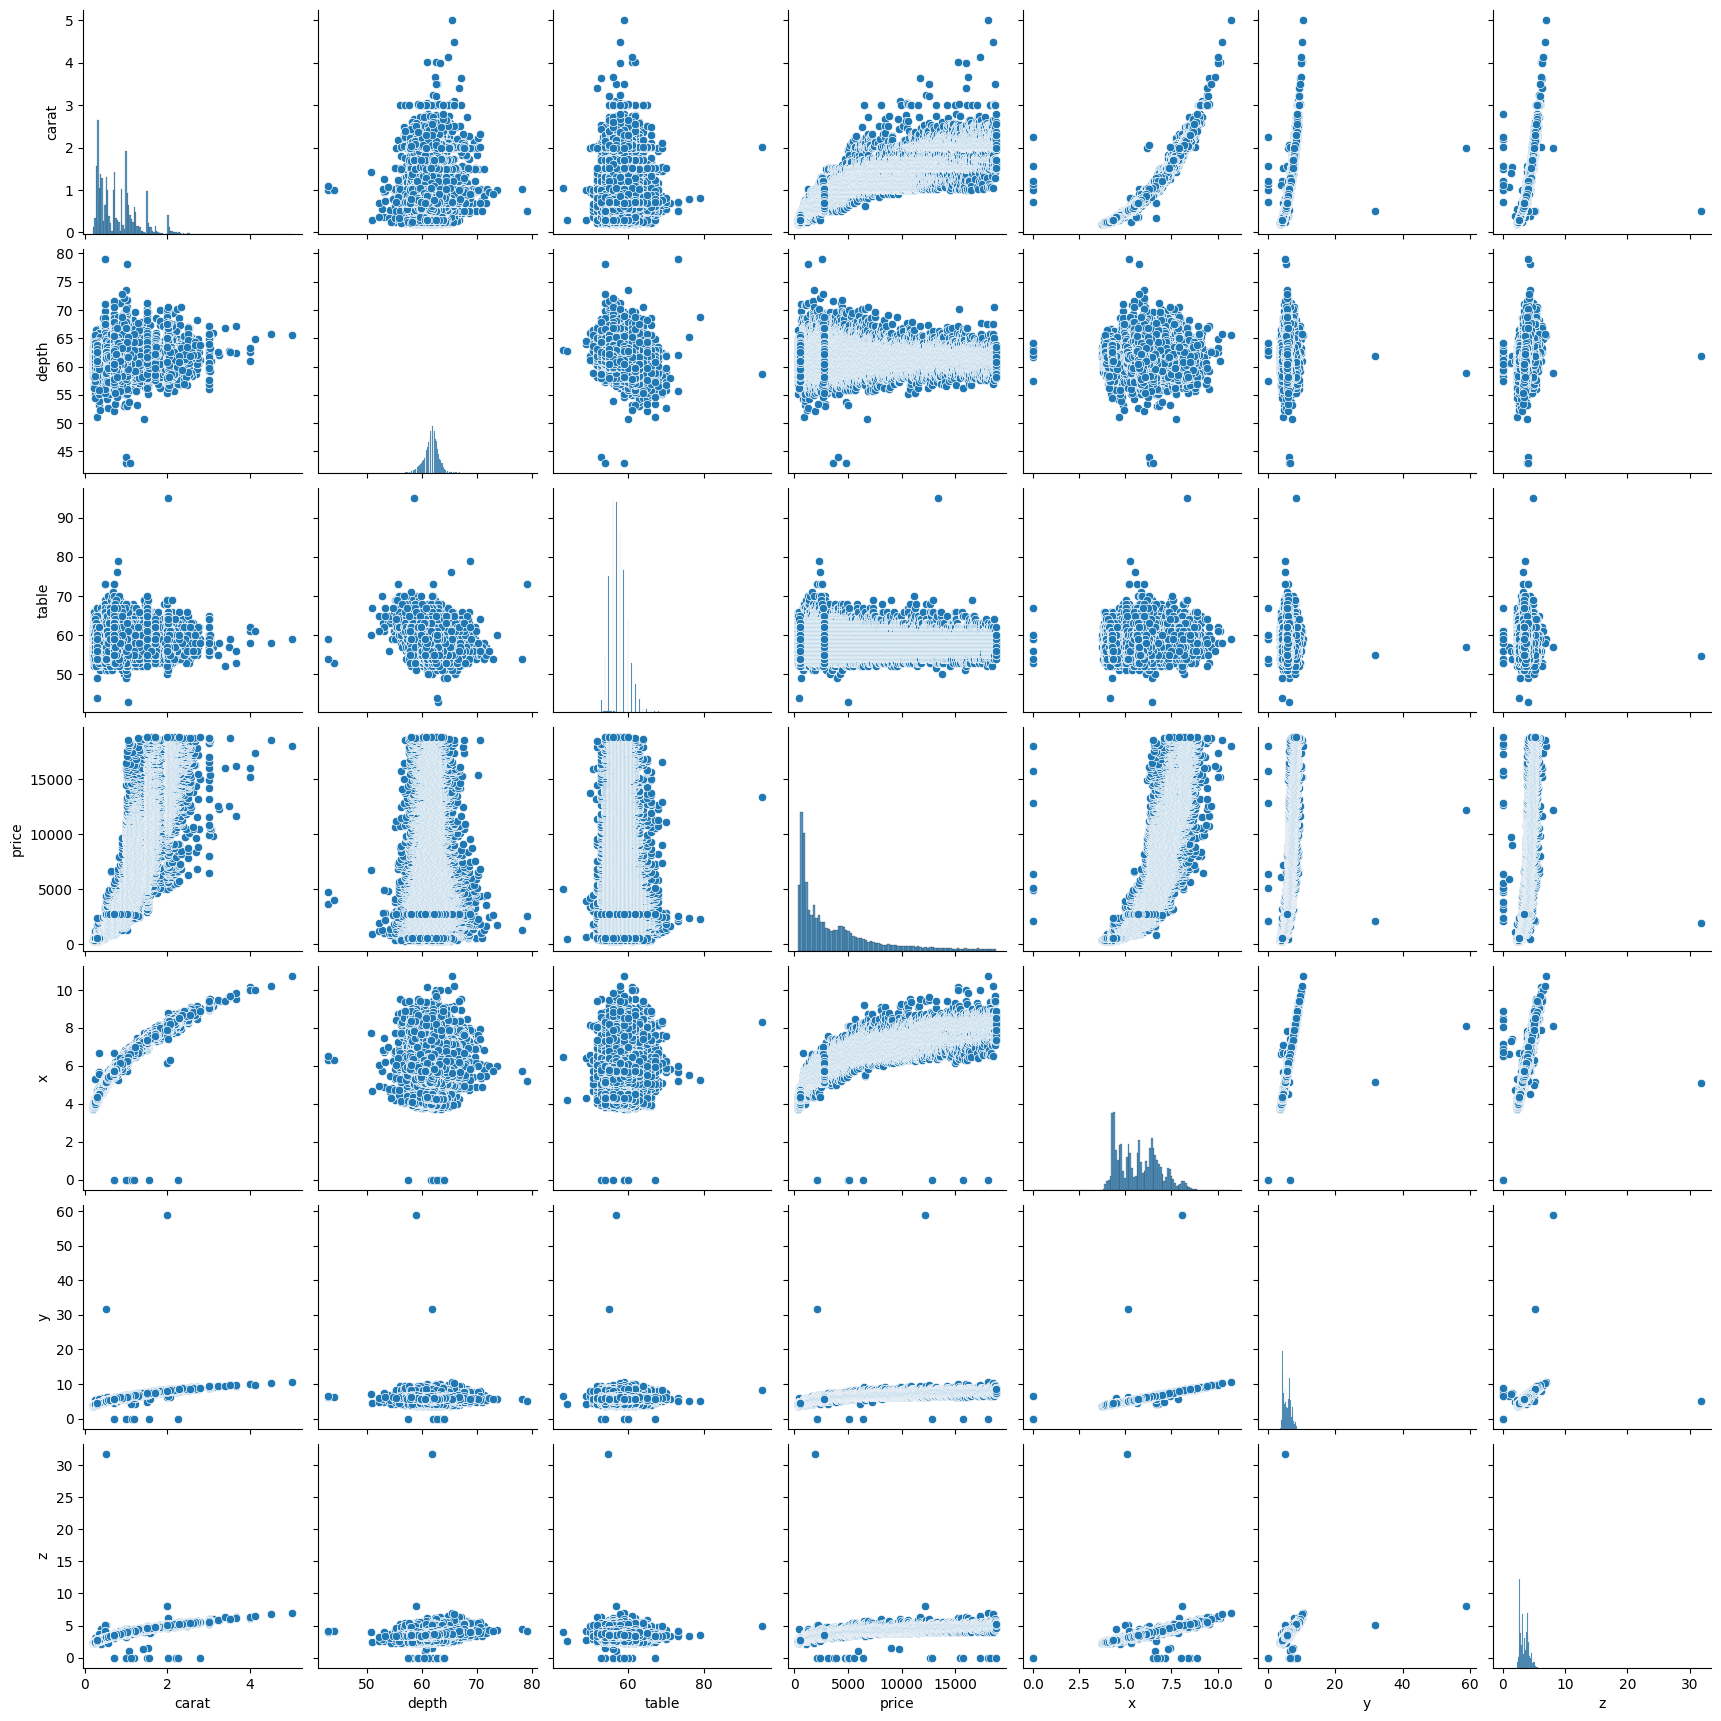

In [22]:
sns.pairplot(df)